# Clustering

The code is based in the work of Gael Varoquaux, using scikit-learn functions. Its information is present inside the code. The program finds N clusters in the image provided, where the K values is delimited by the code.

Import the neccesary libraries

In [8]:
print(__doc__)

# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>, Brian Cheung
# License: BSD 3 clause

import time

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
#import cv2
#import scipy.misc

Automatically created module for IPython interactive environment


In [9]:
# load the raccoon face as a numpy array
try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=False)
except ImportError:
    face = sp.face(gray=False)

Read the images

Resize the image for faster processing

In [10]:
face = sp.misc.imresize(face, 0.10) / 255.
#from skimage import data, color
#from skimage.transform import rescale, resize, downscale_local_mean
#image = face
#image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


Obtain the graphs of the images. The values obtained are the gradient on the edges

In [11]:
graph = image.img_to_graph(face)

The exponential function makes a decreasing function of the gradient

The lower the beta value, the more independend the segmentation

In [12]:
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

Select the number of regions, or clusters, using Spectral clustering

In [13]:
N_REGIONS = 25

Obtain the clusters, using Spectral clustering with K means and Discretize

TypeError: Input must be a 2D array.

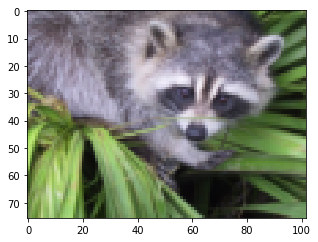

In [14]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)
    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()